<a href="https://colab.research.google.com/github/CodeHunterOfficial/CCPiOIIC/blob/main/ML/%D0%90%D1%80%D0%B0%D0%B1%D0%BE%D0%B2%D0%9C%D0%9A_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополнительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайтеЖ ниже будут подсказки, как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [14]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

 #tf.enable_eager_execution()

2.17.1


####Вспомогательный код

In [15]:
#@title
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["acc"],label='train accuracy')
    plt.plot(history["val_acc"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

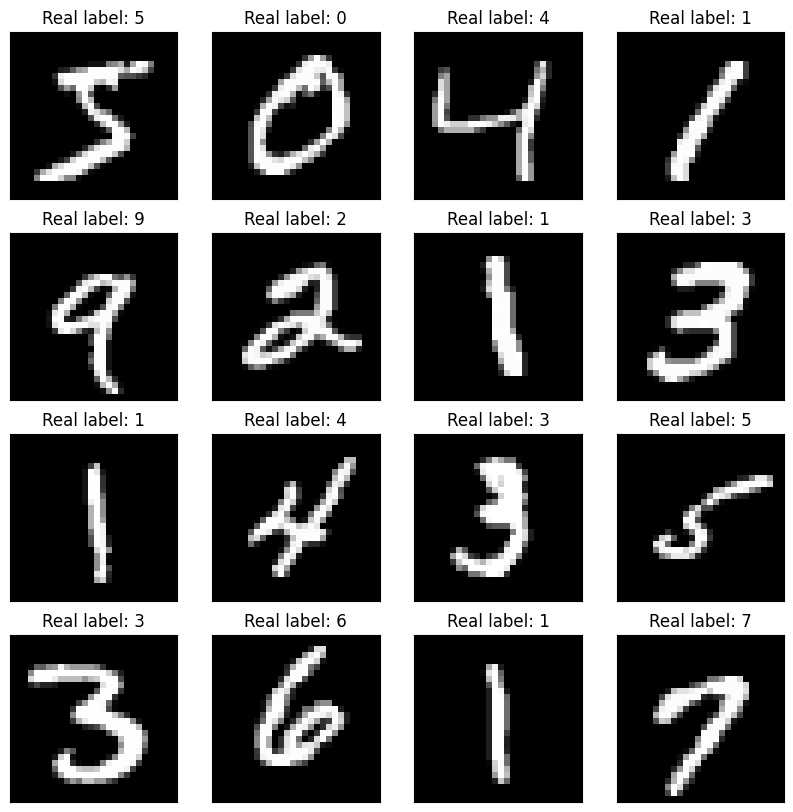

In [16]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))


In [17]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [18]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку,
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/MyDrive/ArabovsLabs/model_1")

path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.keras"
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [22]:
import tensorflow as tf
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Подключение Google Drive
drive.mount('/content/drive')

# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Преобразование изображений в векторы
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# Создание модели
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Создание пути для сохранения чекпоинтов
path = Path("/content/drive/MyDrive/ArabovsLabs/model_1")
path.mkdir(exist_ok=True, parents=True)
cpt_filename = "best_checkpoint.keras"
cpt_path = str(path / cpt_filename)

# Callback для сохранения лучшей модели
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=cpt_path,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Обучение модели
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[checkpoint_callback]
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8268 - loss: 0.5590
Epoch 1: val_accuracy improved from -inf to 0.96050, saving model to /content/drive/MyDrive/ArabovsLabs/model_1/best_checkpoint.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8275 - loss: 0.5567 - val_accuracy: 0.9605 - val_loss: 0.1325
Epoch 2/20
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9495 - loss: 0.1709
Epoch 2: val_accuracy improved from 0.96050 to 0.96870, saving model to /content/drive/MyDrive/ArabovsLabs/model_1/best_checkpoint.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9495 - loss: 0.1708 - val_accuracy: 0.9687 - val_loss: 0.1028
Epoch 3/20
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9607 - loss: 0.1306
Epoch 3: val_accuracy improved from 0.96870 to 0.97330, saving model to /content/drive/MyDrive/Ar

In [29]:
def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["accuracy"], label='train accuracy')  # Используем "accuracy"
    plt.plot(history["val_accuracy"], label='test accuracy')  # Используем "val_accuracy"
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"], label='train loss')
    plt.plot(history["val_loss"], label='test loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

Проверка требований

In [23]:
# Проверка требований
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

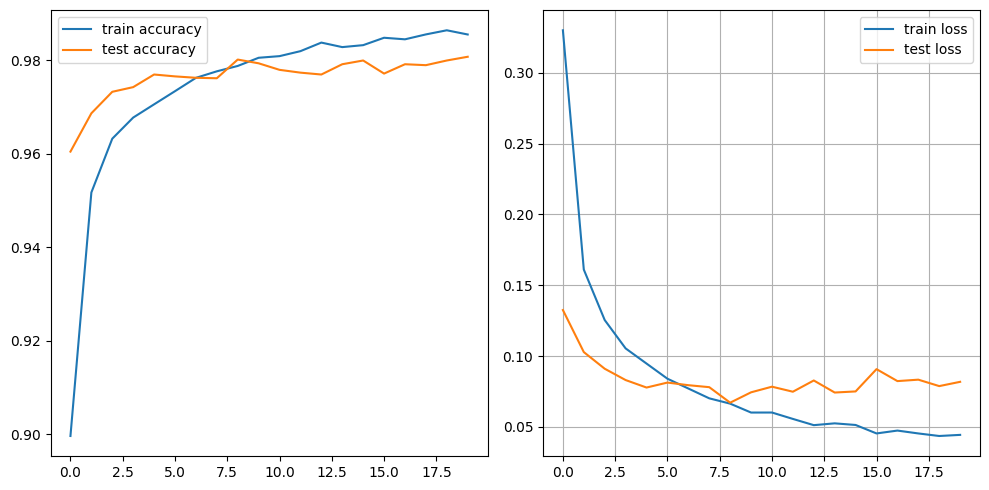

In [30]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [25]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9785 - loss: 0.0898
Accuracy of restored model 98.08%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


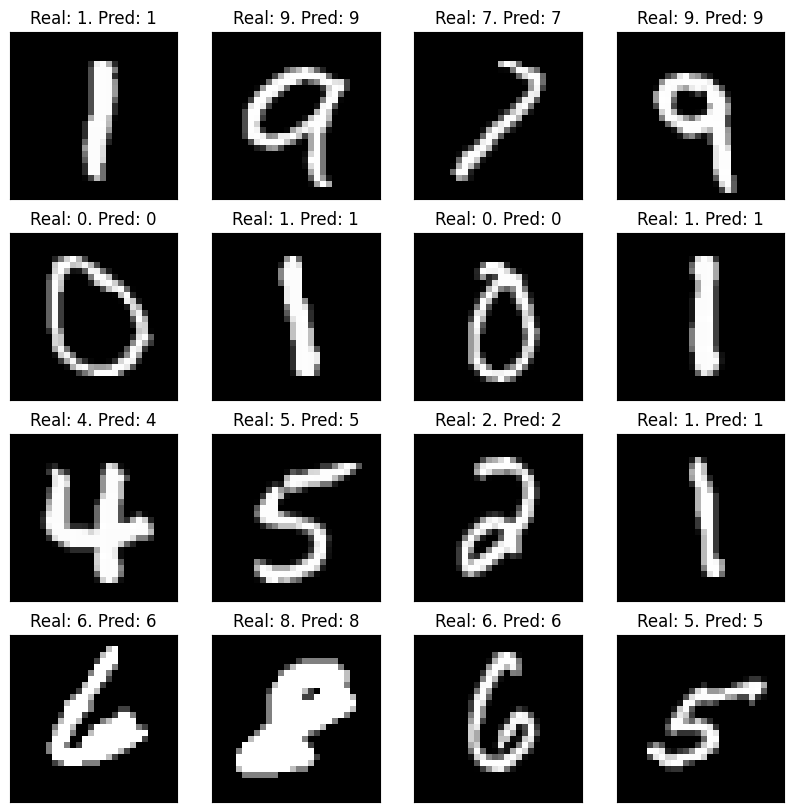

In [33]:
# Визуализация предсказаний
predicted_labels = np.argmax(restored_model.predict(x_test), axis=1)  # Используем predict и argmax
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [27]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9785 - loss: 0.0898
Accuracy of restored model 98.08%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


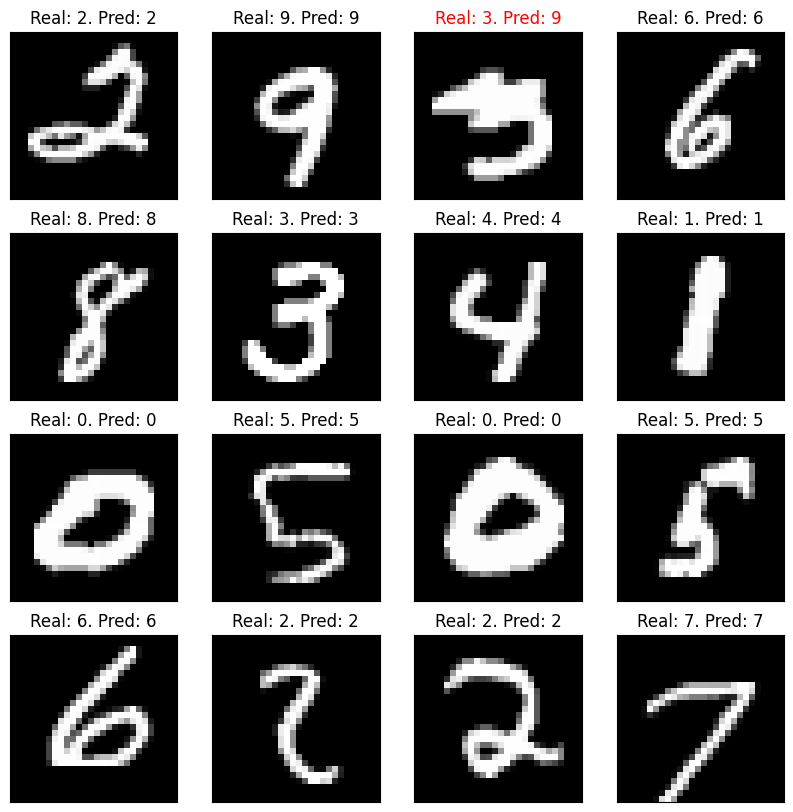

In [34]:
# Визуализация предсказаний
predicted_labels = np.argmax(restored_model.predict(x_test), axis=1)  # Используем predict и argmax
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])